# **import dependencies**


In [ ]:
from pathlib import Path
import pandas as pd
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

# **preprocess the data**

In [ ]:
# get the  data
#data = Path('/VADATA.csv')
#VA_df = pd.read_csv(data)
#VA_df.head()

In [ ]:
#get data
data = 'https://raw.githubusercontent.com/DeryaOkulda2012/VA_Analysis/main/VADATACSV.csv'
VA_df = pd.read_csv(data)
VA_df.head()

,medical_expenditures,unique_patients,fy,city,county_name,yr_q,bptw,ojs,swo,rmoaagptw,ipm,opm,npcacw30dfpd,nscacw30dfpd,nmhacw30dfpd,eff
0,87061,5302,2018,Birmingham,JEFFERSON,FY15_Q1,62.315,3.657,3.6,3.763,97.257,88.849,99.449,97.105,99.834,94.739
1,502617,26979,2020,Birmingham,JEFFERSON,FY15_Q1,62.315,3.657,3.6,3.763,97.257,88.849,99.449,97.105,99.834,94.739
2,449798,27543,2019,Birmingham,JEFFERSON,FY15_Q1,62.315,3.657,3.6,3.763,97.257,88.849,99.449,97.105,99.834,94.739
3,87061,5302,2018,Birmingham,JEFFERSON,FY15_Q2,64.212,3.657,3.6,3.763,96.609,89.313,99.183,96.200,99.810,94.664
4,502617,26979,2020,Birmingham,JEFFERSON,FY15_Q2,64.212,3.657,3.6,3.763,96.609,89.313,99.183,96.200,99.810,94.664


In [ ]:
VA_df.describe()

,medical_expenditures,unique_patients,fy,bptw,ojs,swo,rmoaagptw,ipm,opm,npcacw30dfpd,nscacw30dfpd,nmhacw30dfpd,eff
count,2.090000e+03,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,1965.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,1.149230e+06,66789.863636,2018.990909,61.550738,3.733962,3.511088,3.717847,83.040823,86.306713,88.064924,84.192345,95.165841,93.701849
std,1.411039e+06,80688.913527,0.814783,6.251423,0.138384,0.195470,0.177129,10.776054,2.760743,12.142272,9.697840,4.985571,3.181478
min,2.977900e+04,5302.000000,2018.000000,44.238000,3.344000,2.995000,3.217000,40.969000,80.180500,39.397000,59.029000,73.536000,72.183000
25%,1.936360e+05,13795.000000,2018.000000,57.629000,3.639000,3.385000,3.611250,75.924000,84.122000,80.620000,75.384000,92.100250,92.470000
50%,4.170765e+05,23876.000000,2019.000000,62.416000,3.743500,3.540000,3.733000,83.603000,86.611000,92.978000,85.314000,97.005000,94.639000
75%,2.413448e+06,154726.000000,2020.000000,65.846000,3.840000,3.655250,3.845000,90.886000,88.399000,97.663500,93.076500,99.203500,95.872000
max,4.233155e+06,229782.000000,2020.000000,78.698000,4.075000,4.016000,4.189000,100.000000,93.742000,100.000000,99.915000,100.000000,97.456000


In [ ]:
# examine the proportion of missing values in the dataset:
VA_df.isnull().sum().sort_values(ascending=False)/VA_df.shape[0]

ipm                     0.059809
medical_expenditures    0.000000
unique_patients         0.000000
fy                      0.000000
city                    0.000000
county_name             0.000000
yr_q                    0.000000
bptw                    0.000000
ojs                     0.000000
swo                     0.000000
rmoaagptw               0.000000
opm                     0.000000
npcacw30dfpd            0.000000
nscacw30dfpd            0.000000
nmhacw30dfpd            0.000000
eff                     0.000000
dtype: float64

In [ ]:
#Instantiate SimpleImputer 
si=SimpleImputer(missing_values = np.nan, strategy="median")
si.fit(VA_df[['ipm']])
  
#Filling missing data with median
VA_df[['ipm']] = si.transform(VA_df[['ipm']])

In [ ]:
# Generate our categorical variable list
VA_cat = VA_df.dtypes[VA_df.dtypes == "object"].index.tolist()

In [ ]:
# Check the number of unique values in each column
VA_df[VA_cat].nunique()

city           37
county_name    37
yr_q           19
dtype: int64

In [ ]:
# Print out the city value counts
city_counts = VA_df.city.value_counts()
city_counts

Birmingham        57
Orlando           57
West Palm         57
Atlanta           57
Augusta           57
Dublin            57
Bedford           57
Boston            57
Northampton       57
Ann Arbor         57
Battle Creek      57
Detroit           57
Iron Mountain     57
Saginaw           57
Minneapolis       57
St Cloud          57
Gulf Coast HCS    57
Tampa             57
Miami             57
Montgomery        57
Lake City         57
Tuscaloosa        57
Fresno            57
Loma Linda        57
Long Beach        57
Los Angeles       57
Palo Alto         57
Sacramento        57
San Diego         57
San Francisco     57
Connecticut       57
Wilmington        57
Washington        57
Bay Pines         57
Gainesville       57
Jackson           57
Anchorage         38
Name: city, dtype: int64

In [ ]:
# Print out the County value counts
county_counts = VA_df.county_name.value_counts()
county_counts

JEFFERSON               57
ORANGE                  57
PALM BEACH              57
DEKALB                  57
RICHMOND                57
LAURENS                 57
MIDDLESEX               57
SUFFOLK                 57
HAMPSHIRE               57
WASHTENAW               57
KALAMAZOO               57
WAYNE                   57
DICKINSON               57
SAGINAW                 57
HENNEPIN                57
STEARNS                 57
HARRISON                57
HILLSBOROUGH            57
MIAMI-DADE              57
MONTGOMERY              57
COLUMBIA                57
TUSCALOOSA              57
FRESNO                  57
SAN BERNARDINO          57
LOS ANGELES COUNTY      57
LOS ANGELES             57
SANTA CLARA             57
SACRAMENTO              57
SAN DIEGO               57
SAN FRANCISCO           57
NEW HAVEN               57
NEW CASTLE              57
DISTRICT OF COLUMBIA    57
PINELLAS                57
ALACHUA                 57
HINDS                   57
ALASKA                  38
N

In [ ]:
# Print out the yr_q value counts
yr_counts = VA_df.yr_q.value_counts()
yr_counts

FY15_Q1    110
FY17_Q3    110
FY19_Q2    110
FY19_Q1    110
FY18_Q4    110
FY18_Q3    110
FY18_Q2    110
FY18_Q1    110
FY17_Q4    110
FY17_Q2    110
FY15_Q2    110
FY17_Q1    110
FY16_Q4    110
FY16_Q3    110
FY16_Q2    110
FY16_Q1    110
FY15_Q4    110
FY15_Q3    110
FY19_Q3    110
Name: yr_q, dtype: int64

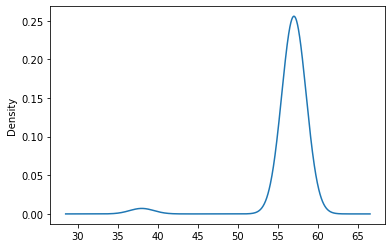

In [ ]:
# Visualize the value counts
city_counts.plot.density()

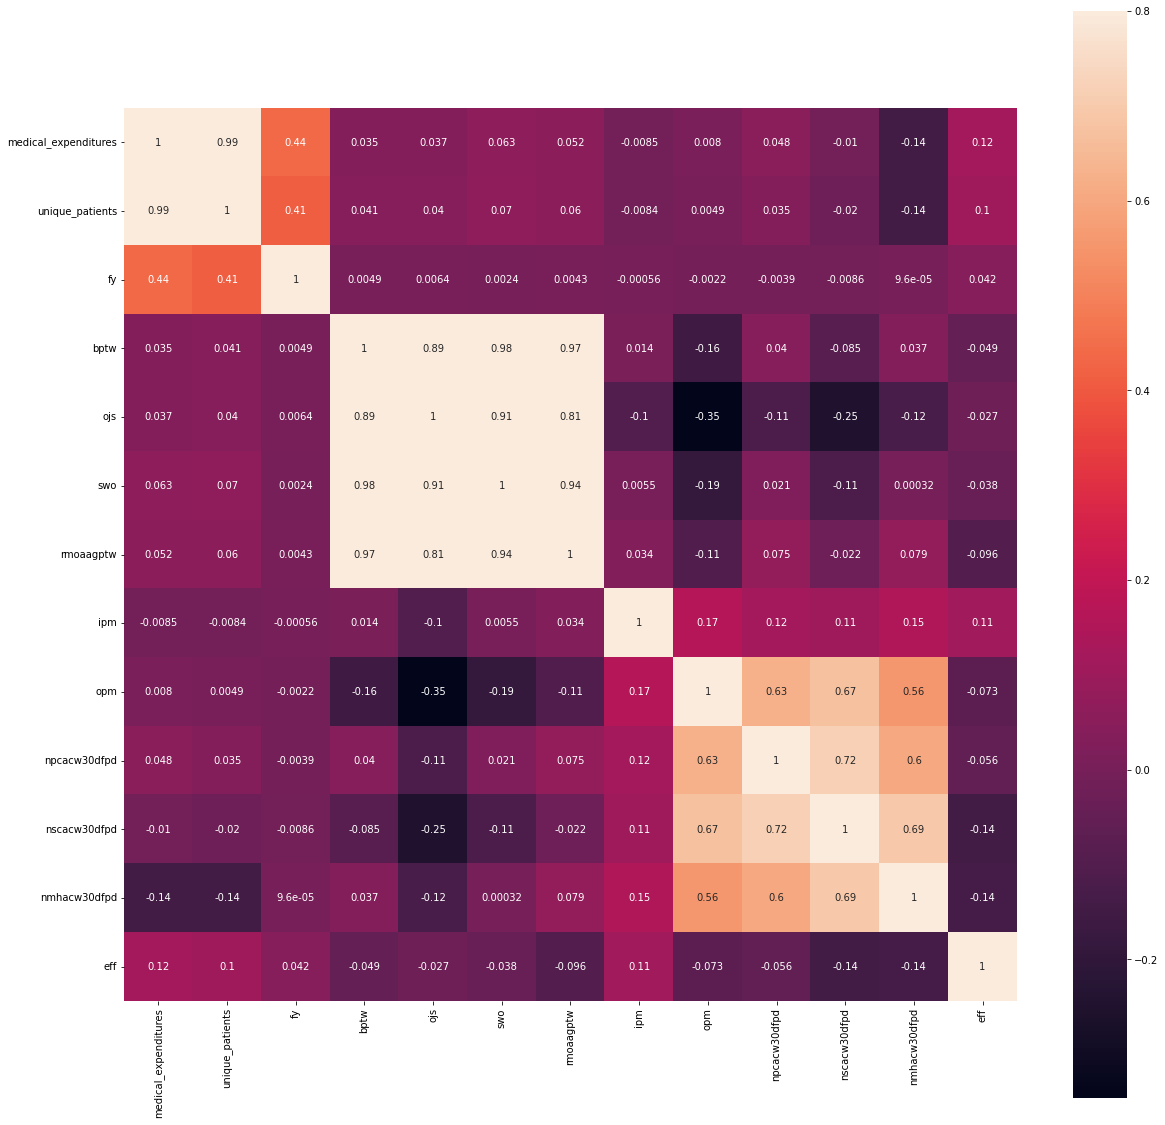

In [ ]:
# plot the correlation between features
C_mat = VA_df.corr()
fig = plt.figure(figsize = (20,20))

sb.heatmap(C_mat, vmax = .8, square = True, annot = True)
plt.show()

In [ ]:
#One Hot Encode The Categorical Features :

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(VA_df[VA_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(VA_cat)
encode_df.head()

,city_Anchorage,city_Ann Arbor,city_Atlanta,city_Augusta,city_Battle Creek,city_Bay Pines,city_Bedford,city_Birmingham,city_Boston,city_Connecticut,...,yr_q_FY17_Q2,yr_q_FY17_Q3,yr_q_FY17_Q4,yr_q_FY18_Q1,yr_q_FY18_Q2,yr_q_FY18_Q3,yr_q_FY18_Q4,yr_q_FY19_Q1,yr_q_FY19_Q2,yr_q_FY19_Q3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Merge one-hot encoded features and drop the originals
VA_df = VA_df.merge(encode_df,left_index=True, right_index=True)
VA_df = VA_df.drop(VA_cat,1)
VA_df.head()

,medical_expenditures,unique_patients,fy,bptw,ojs,swo,rmoaagptw,ipm,opm,npcacw30dfpd,...,yr_q_FY17_Q2,yr_q_FY17_Q3,yr_q_FY17_Q4,yr_q_FY18_Q1,yr_q_FY18_Q2,yr_q_FY18_Q3,yr_q_FY18_Q4,yr_q_FY19_Q1,yr_q_FY19_Q2,yr_q_FY19_Q3
0,87061,5302,2018,62.315,3.657,3.6,3.763,97.257,88.849,99.449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,502617,26979,2020,62.315,3.657,3.6,3.763,97.257,88.849,99.449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,449798,27543,2019,62.315,3.657,3.6,3.763,97.257,88.849,99.449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87061,5302,2018,64.212,3.657,3.6,3.763,96.609,89.313,99.183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,502617,26979,2020,64.212,3.657,3.6,3.763,96.609,89.313,99.183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Standardize the data**

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Define Features and Target**

In [ ]:
# Split our preprocessed data into our features and target arrays
X = VA_df.drop('eff', axis = 1)
y = VA_df['eff']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=78)

**Random Forest Model**

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
print(f'Training Score: {random_forest_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {random_forest_model.score(X_test_scaled, y_test)}')

Training Score: 0.9953295181302503
Testing Score: 0.9549886301029364


In [ ]:
#print MAE score for Random forest
predicted_prices = model.predict(X_test)
MAE = mean_absolute_error(y_test , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  3.9064955023922647


**Deep Neural Network**

In [ ]:
# Define the model - deep neural net
NN_model = Sequential()

# the input layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train_scaled.shape[1], activation='relu'))

# First hidden layer
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# Output layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile and check the structure of the model
# Compile the model
NN_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["MAE"])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13568     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 178,433
Trainable params: 178,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define a checkpoint callback
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
# Train the model
fit_model = NN_model.fit(X_train,y_train,epochs=800)

Epoch 1/800
53/53 [==============================] - 0s 7ms/step - loss: 44.7938 - MAE: 4.3514
Epoch 2/800
53/53 [==============================] - 0s 8ms/step - loss: 21.4852 - MAE: 3.2675
Epoch 3/800
53/53 [==============================] - 0s 8ms/step - loss: 33.4021 - MAE: 4.0024
Epoch 4/800
53/53 [==============================] - 0s 8ms/step - loss: 32.3909 - MAE: 3.9861
Epoch 5/800
53/53 [==============================] - 0s 8ms/step - loss: 24.3047 - MAE: 3.4716
Epoch 6/800
53/53 [==============================] - 0s 8ms/step - loss: 19.5921 - MAE: 3.1654
Epoch 7/800
53/53 [==============================] - 0s 7ms/step - loss: 20.5415 - MAE: 3.2334
Epoch 8/800
53/53 [==============================] - 0s 8ms/step - loss: 22.6020 - MAE: 3.2577
Epoch 9/800
53/53 [==============================] - 0s 7ms/step - loss: 55.5867 - MAE: 4.9841
Epoch 10/800
53/53 [==============================] - 0s 7ms/step - loss: 33.8882 - MAE: 4.0225
Epoch 11/800
53/53 [=============================

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = NN_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, MAE: {model_accuracy}")

14/14 - 0s - loss: 7.7532 - MAE: 2.1699 - 40ms/epoch - 3ms/step
Loss: 7.753208637237549, MAE: 2.1699297428131104


**XGBRegressor model**

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train,verbose=False)

[16:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  1.0788078971023196


In [ ]:
# print feature importance

In [39]:
XGBModel.feature_importances_

array([3.52216139e-02, 1.23400250e-02, 0.00000000e+00, 1.62867345e-02,
       2.39347946e-02, 2.58311396e-03, 3.01967189e-02, 9.73942224e-03,
       1.34227062e-02, 7.28081912e-03, 1.57759953e-02, 5.54768043e-03,
       6.45010769e-02, 1.26744043e-02, 2.11826768e-02, 4.31564823e-02,
       0.00000000e+00, 0.00000000e+00, 4.60587926e-02, 0.00000000e+00,
       3.40054706e-02, 5.32035228e-05, 2.05657016e-02, 0.00000000e+00,
       7.83957075e-03, 0.00000000e+00, 4.39781621e-02, 2.80006453e-02,
       4.19154316e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.25959804e-02, 0.00000000e+00, 8.61928891e-03, 6.55052252e-03,
       1.02762990e-02, 1.08981673e-02, 0.00000000e+00, 1.36531945e-02,
       2.14579664e-02, 0.00000000e+00, 3.72749264e-03, 4.86995056e-02,
       4.41373885e-02, 0.00000000e+00, 3.12201716e-02, 4.30681370e-02,
       4.37832102e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      